In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({'Condition 1': np.random.rand(20),
                   'Condition 2': np.random.rand(20)*0.9,
                   'Condition 3': np.random.rand(20)*1.1})
df.head()

,Condition 1,Condition 2,Condition 3
0,0.548814,0.880757,0.395459
1,0.715189,0.719243,0.480735
2,0.602763,0.415331,0.767394
3,0.544883,0.702476,0.066248
4,0.423655,0.106447,0.733443


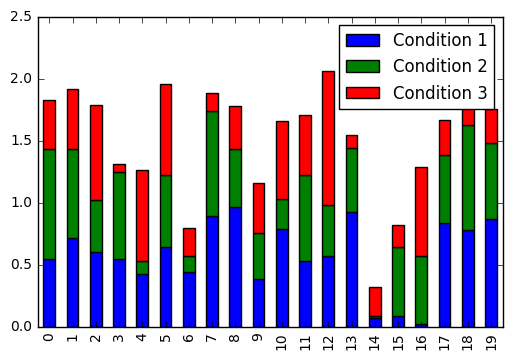

In [5]:
fig,ax = plt.subplots()
df.plot.bar(ax=ax,stacked=True)
plt.show()

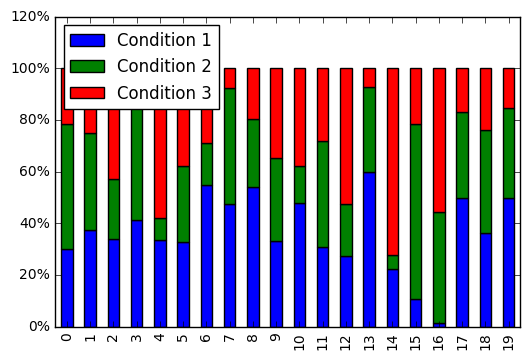

In [7]:
from matplotlib.ticker import FuncFormatter

df_ratio = df.div(df.sum(axis=1),axis=0)
fig,ax = plt.subplots()
df_ratio.plot.bar(ax=ax,stacked=True)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_:'{:.0%}'.format(y)))
plt.show()

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df = pd.read_csv(url, na_values="?")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import Imputer

impute =  pd.DataFrame(Imputer().fit_transform(df))
impute.columns = df.columns
impute.index = df.index

impute.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Explained variance:
PC1 59.41%
PC2 14.59%
PC3 9.02%


<IPython.core.display.Javascript object>


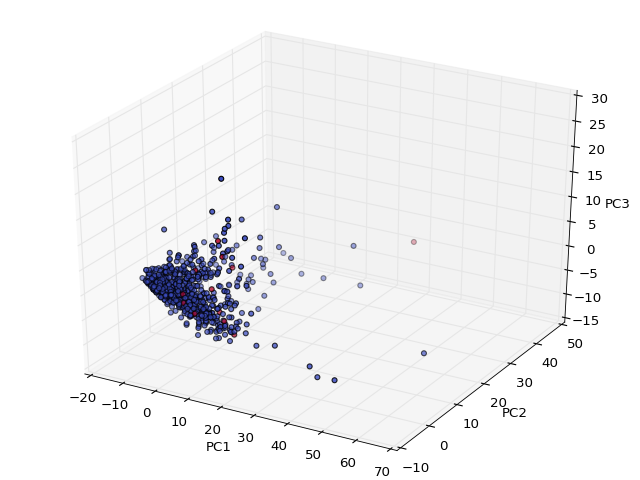

In [11]:
features = impute.drop('Dx:Cancer', axis=1)
y = impute["Dx:Cancer"]

pca = PCA(n_components=3)
X_r = pca.fit_transform(features)

print("Explained variance:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
      .format(pca.explained_variance_ratio_[0],
              pca.explained_variance_ratio_[1],
              pca.explained_variance_ratio_[2]))

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()